In [1]:
from klusta.kwik import KwikModel
import numpy as np
import pandas as pd

kpath="/home/harison/UFPE/data/g01.kwik"



In [2]:
from klusta.kwik import KwikModel
import numpy as np
import pandas as pd


class KwikFile:
    """!  @brief Model for Kwik file, strongly based on KwikModel from phy project

    The main purpose of this class is provide an abstraction for kwik files provided by phy project. The current version contains a basic set of fundamental methods used in kwik file      
    @author: Nivaldo A P de Vasconcelos
    @date: 2018.Feb.02
    """
    
    #get_path
    def __init__(self,kpath=None,name=None):
        
        
        self.kwik_model=None
        self.name = name
        self.kpath=None
        if (kpath is not None):
            self.kwik_model=KwikModel(kpath)
            self.kpath=kpath
            if (name is None):
                self.name = self.kwik_model.name
            print ("Created class on = %s !" % kpath)
        else:
            print ("It still with no path:(")
    


    def get_name(self):
        """! @brief Returns the found in name field in kwik file.

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02
        """
        return (self.name)

    def set_kwik_file (self,kpath):
        """! @brief Defines the corresponding kwik file

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02
        """
        self.kwik_model=KwikModel(kpath)
        self.name = self.kwik_model.name
        self.kpath=kpath


    def sampling_rate (self):
        """! @brief Returns the sampling rate used during the recordings 

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02
        """
        return (self.kwik_model.sample_rate)
    
    def shank (self):
        """! @brief Returns the shank/population's id used to group the recordings.

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02
        """
        return (self.kwik_model.name)
    
    def get_spike_samples (self):
        """! @brief Returns the spike's samples on the recordings.

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02
        """

        return (self.kwik_model.spike_samples)
    
    def get_spike_clusters (self):
        """! @brief Returns the corresponding spike's clusters on the recordings.

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02
        """
        return (self.kwik_model.spike_clusters)
    
    def describe(self):
        """! @brief Describes the kwik file

        It calls the describe method in KwikModel

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02
        """
        self.kwik_model.describe()

    def close (self):
        """! @brief Closes the corresponding kwik model

        It calls the close method in KwikModel

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02
        """
        self.kwik_model.close()

    def list_of_groups (self):
        """! @brief Returns the list of groups found in kwik file

        The result has a list's form.

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02
        """

        lgroups = list(self.groups().values())
        lgroups = list(set(lgroups))

        return (lgroups)

    def list_of_non_noisy_groups (self):

        """! @brief Returns the list of groups found in kwik file which are not called noise

        The result has a list's form.

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02
        """

        lgroups = list(self.groups().values())
        lgroups = list(set(lgroups)-set(['noise',]))
        return (lgroups)


    def all_clusters (self):
        """! @brief Returns the list of all clusters in kwik file

        The result has a list's form.

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02
        """

        llabels = list(self.groups().keys())
        llabels = list(set(llabels))

        return (llabels)


    def groups(self):
        """! @brief Returns a dict with cluster label and its respective group

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02
        """
        if not(isinstance(self.kwik_model,KwikModel)):
            raise ValueError("There is no KwikModel assigned for this object.")
        return (self.kwik_model.cluster_groups)


    def clusters (self,group_name=None):
        """! @brief Returns the list of clusters on kwik file

        It can be used to get the list of clusters for a given group by pproviding
        this information the group_name.

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02
        """
        if (group_name is None):
            return (self.all_clusters())
 
        if not(group_name in self.list_of_groups()):
            raise ValueError("\nThis group was not found in kwik file: %s\n" % group_name)
        group=self.groups()

        clusters=[]
        for c in self.all_clusters():
            if (group[c]==group_name):
                clusters.append(c)
        clusters.sort()
        return (clusters)

    def all_spikes_on_groups (self,group_names):
        """! @brief Returns the all spike samples within a list of groups

        Usually the clusters are organized in groups. Ex: noise, mua, sua,
        unsorted This method returns, in a single list of spike samples, all
        spikes found in a lists of groups (group_names). 

        Parameters:
        group_names: list of group names, where the spikes will be searched. 

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02 
        """

        spikes=[]
        all_spikes=self.get_spike_samples()
        all_labels=self.get_spike_clusters()
        
        if not(isinstance(group_names,list)):
           raise ValueError("\nThe argument must be a list.") 
        
        for group_name in group_names:
            if not(group_name in self.list_of_groups()):
                raise ValueError("\nThis group was not found in kwik file: %s\n" % group_name)
            for c in self.clusters(group_name=group_name):
                spikes=spikes+list(all_spikes[all_labels==c])
        spikes.sort()
        return (spikes)
    
    def all_spike_id_on_groups (self,group_names):
        """! @brief Returns the all spike id within a list of groups

        Usually the clusters are organized in groups. Ex: noise, mua, sua,
        unsorted This method returns, in a single list of spike samples, all
        spikes found in a lists of groups (group_names). 

        Parameters:
        group_names: list of group names, where the spike ids will be searched. 

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02 
        """

        spk_id=[]
        all_spk_id=self.kwik_model.spike_ids
        all_labels=self.get_spike_clusters()
        
        if not(isinstance(group_names,list)):
           raise ValueError("\nThe argument must be a list.") 
        
        for group_name in group_names:
            if not(group_name in self.list_of_groups()):
                raise ValueError("\nThis group was not found in kwik file: %s\n" % group_name)
            for c in self.clusters(group_name=group_name):
                spk_id=spk_id+list(all_spk_id[all_labels==c])
        spk_id.sort()
        return (spk_id)


    def group_firing_rate (self,group_names=None,a=None,b=None): 
        """! @brief Returns firing rate in a given set of groups found in kwik file.

        Usually, the clusters are organized in groups. Ex: noise, mua, sua,
        unsorted. This method returns, in a doubled dictionary, the firing rate
        for each cluster, organized by groups.

        Parameters: 
        group_names: list of group names, where the spikes will be
        searched. When this input is 'None' all groups are taken. The resulting
        dictionary has the first keys as groups, and the second keys as the
        respective cluster id's, whereas the value, is the corresponding firing
        rate within [a,b].


        Please refer to the method cluster_firing_rate in order to get more 
        details about the firing calculation.

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02 
        """
        if not(isinstance(group_names,list)) and not(group_names is None):
           raise ValueError("\nThe argument must be a list or a None.") 
        spk=dict()
        if group_names is None:
            group_names=self.list_of_non_noisy_groups()
        for group_name in group_names:
            if not(group_name in self.list_of_groups()):
                raise ValueError("\nThis group was not found in kwik file: %s\n" % group_name)
            spk[group_name]=dict()
            for c in self.clusters(group_name=group_name):
                spk[group_name][c]=self.cluster_firing_rate(c,a=a,b=b)
        return (spk)


    def cluster_firing_rate (self,cluster_id,a=None,b=None):
        """! @brief Returns firing rate in a given cluster_id found in the kwik file

        In the kwik file, a cluster stores the spike times sorted for a given neuronal
        unit. The firing rate here is calculated by dividing the number of spike times
        by the number of seconds of the time period definedd by [a,b]. 
        If a is 'None' a is assingned to zero; if b is 'None', it is assigned to the time
        of the last spike within the cluster.

        Parameters:
        cluster_id: id which identifies the cluster.
        a,b: limits of the time period where the firing rate must be calculated.

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02 
        """
        sr=self.sampling_rate()
        spikes=np.array(self.spikes_on_cluster (cluster_id))/sr
        if a is None:
            a=0
        if b is None:
            b=spikes[-1]
        if (a==b):
            raise ValueError ("\nThe limits of the time interval are equal\n")
        piece=spikes[(spikes>=a)]
        piece=piece[piece<=b]
        return (len(piece)/(b-a))

    def spikes_on_cluster (self,cluster_id):
        """! @brief Returns the all spike samples within a single cluster

        Parameters:
        cluster_id: id used to indentify the cluster.

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02 
        """

        if not(cluster_id in self.all_clusters()):
            raise ValueError("\nThis cluster was not found in kwik file: %s\n" % cluster_id)
        all_spikes=self.get_spike_samples()
        all_labels=self.get_spike_clusters()
        spikes=list(all_spikes[all_labels==cluster_id])
        spikes.sort()
        return (spikes)

    def group_firing_rate_to_dataframe (self,group_names=None,a=None,b=None):
        """! @brief Exports the group's firing rate into a pandas dataframe


        Usually, the clusters are organized in groups. Ex: noise, mua, sua,
        unsorted. This method returns, in a pandas dataframe, which contains the
        following information for each unit: 'shank', 'group', 'label', and 'fr';

        
        Parameters:
        group_names: list of group names, where the spikes will be
        searched. When this input is 'None' all groups are taken. The resulting
        dictionary has the first keys as groups, and the second keys as the
        respective cluster id's, whereas the value, is the corresponding firing
        rate within [a,b].

        Please refer to the method cluster_firing_rate in order to get more 
        details about the firing calculation.

        Author: Nivaldo A P de Vasconcelos
        Date: 2018.Feb.02 
        """
        d=self.group_firing_rate (group_names=group_names,a=a,b=b)

        shank_id = self.name
        group_names = d.keys()
        data=[]
        for group_name in group_names:
            for label in d[group_name].keys():        
                fr=d[group_name][label]
                data.append ({"shank_id":shank_id, "group":group_name,"label":label,"fr":fr})
        return (pd.DataFrame(data))

In [3]:
help (KwikFile.all_spike_id_on_groups)

Help on function all_spike_id_on_groups in module __main__:

all_spike_id_on_groups(self, group_names)
    ! @brief Returns the all spike id within a list of groups
    
    Usually the clusters are organized in groups. Ex: noise, mua, sua,
    unsorted This method returns, in a single list of spike samples, all
    spikes found in a lists of groups (group_names). 
    
    Parameters:
    group_names: list of group names, where the spike ids will be searched. 
    
    Author: Nivaldo A P de Vasconcelos
    Date: 2018.Feb.02



In [4]:
import kwikfile as kf
import numpy as np
import imp
%matplotlib inline
import matplotlib.pyplot as plt
from klusta.kwik import KwikModel
#from phy.io import KwikModel
import matplotlib as mpl
from pylab import *
import sys

import ipywidgets as widgets
from IPython.display import display
import time

class ColorMap:
    """!  @brief model that returns an average detection of each site of a given kwik file.
    
    @author: Harison P B de Oliveira
    @date: 2018.May.23
    """
    
    def __init__(self,kpath=None,name=None):
        if kpath is None:
            print ("It still with no path")
        else:
            self.kwik_model=KwikModel(kpath)
            self.kwikfile=kf.KwikFile(kpath)
            self.kpath=kpath
            if name is None:
                self.name=self.kwikfile.name
            else:
                self.name=name
            print ("Created class on = %s !" % self.kpath)
            
    def get_median_amplitude_group(self):
       
        spk_id=self.kwikfile.all_spike_id_on_groups(group_names=self.kwikfile.list_of_non_noisy_groups())
        w=self.kwik_model.all_waveforms
        wf=w[spk_id]
        
        median_amplitudes=dict()
        for elect in range(0,wf.shape[2]):#add kwikfile
            A[elect]=[]
            for i in range(0,len(wf)):
                wave=wf[i,:,elect]
                median_amplitudes[elec].append(np.max(wave)-np.min(wave))
        return median_amplitudes
        
        
    def plot_median_amplitude(self,median_amplitudes=None):
        if median_amplitudes is None:
            return None
        else:
            fig,ax = plt.subplots(figsize=(6, 10))
            num_channels=10

            posx=np.flipud (self.kwik_model.channel_positions [:,0])
            posy=np.flipud (self.kwik_model.channel_positions [:,1])
            #print(posx,posy)
            cmap = mpl.cm.jet
            norm = mpl.colors.Normalize(vmin=min(median_amplitudes), vmax=max(median_amplitudes))
            cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                    norm=norm,
                                    extend='both',
                                    extendfrac='auto',
                                    spacing='uniform',
                                    orientation='vertical') 
            a=list()
            dx=20
            for ch in range (0,num_channels):
                if ch%2==0:
                    x_offset=posx[ch]+dx+ch
                else:
                    x_offset=posx[ch]-dx-ch
                #x_offset = posx[ch]
                y_offset =posy[ch]*2
                circle = plt.Circle((x_offset,y_offset),10,color=cb1.to_rgba(median_amplitudes[ch]))
                a.append(circle)
                
            print("a")
            ax.cla()
            ax.set_xlim((min(posx)-10-dx, max(posx)+10+dx))
            ax.set_ylim((min(posy)*2-10, max(posy)*2+10))
            for i in range(0,num_channels):
                c=a[i]
                ax.add_artist(c)
            print("b")
            data = np.clip(randn(0, 0), -1, 1)
            cax = ax.imshow(data, interpolation='None', cmap=cm.jet)
            cbar = fig.colorbar(cax,ticks=[0,0.5,1],orientation='vertical')
            cbar.ax.set_yticklabels(['Low','Medium','High'])
            plt.gca().invert_yaxis()
            plt.axis('off')

            plt.show()
            
            
        

In [5]:
kf=KwikFile(kpath)
spk_id=kf.all_spike_id_on_groups(group_names=kf.list_of_non_noisy_groups())
len(spk_id)


Created class on = /home/harison/UFPE/data/g01.kwik !


951814

In [17]:
spk_id=kf.spikes_on_cluster(cluster_id=6)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import time

start_time = time.time()
kwik_model=KwikModel(kpath)
w=kwik_model.all_waveforms

wf=w[spk_id]

In [15]:



A=dict()
ampl=[]
for elec in range (0,wf.shape[2]):
    A[elec]=[]
    for i in range(0,len(wf)):
        wave=wf[i,:,elec]
        A[elec].append(np.max(wave)-np.min(wave))
    ampl.append(np.mean(A[elec]))
    
elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

'00:13:04'

In [29]:
print(ampl)
ampl=np.array(ampl)
x=ampl.shape()
print(x)

[ 411.9901123   460.03256226  509.31668091  422.14575195  381.25427246
  336.28009033  337.07473755  288.83343506  271.75302124  255.66950989]


TypeError: 'tuple' object is not callable

Created class on = /home/harison/UFPE/data/g01.kwik !
Created class on = /home/harison/UFPE/data/g01.kwik !
a
b


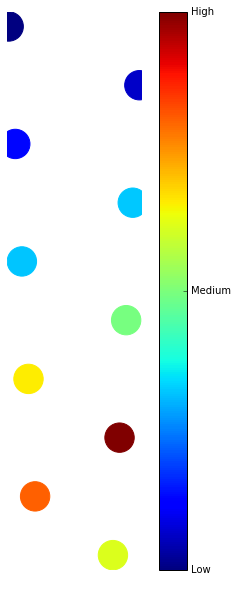

'00:00:00'

In [48]:
hm = ColorMap(kpath)
start_time = time.time()
hm.plot_median_amplitude(ampl)
elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

In [38]:
start_time = time.time()
for i in range(0,10000000):
    i=i+1
elapsed_time = time.time() - start_time
time.strftime("%M:%S", time.gmtime(elapsed_time))

'00:01'

In [4]:
kwik_model=KwikModel(kpath)

In [10]:

kwik_model.spike_clusters
lgroups = list(groups.values())
lgroups = list(set(lgroups)-set(['noise',]))
print (lgroups)


['mua', 'good']


In [11]:
all_spikes=spk_id
all_labels=self.get_spike_clusters()

NameError: name 'self' is not defined

In [8]:
groups=kwik_model.cluster_groups
print (groups)

{0: 'noise', 2: 'noise', 3: 'noise', 4: 'mua', 5: 'mua', 6: 'good', 10: 'noise', 11: 'noise', 14: 'mua', 15: 'mua', 16: 'noise', 20: 'good', 21: 'noise', 22: 'mua', 24: 'mua', 27: 'good', 29: 'noise', 30: 'noise', 31: 'mua', 32: 'mua', 36: 'good', 38: 'mua', 40: 'noise', 41: 'mua', 44: 'noise', 45: 'good', 47: 'mua', 50: 'noise', 51: 'mua', 52: 'good', 55: 'noise', 56: 'good', 57: 'good', 58: 'mua', 60: 'mua', 61: 'noise', 62: 'noise', 66: 'mua', 67: 'good', 70: 'mua', 71: 'good', 72: 'mua', 73: 'noise', 78: 'noise', 83: 'noise', 84: 'mua', 85: 'mua', 87: 'noise', 88: 'noise', 89: 'mua', 91: 'good', 92: 'noise', 94: 'good', 96: 'good', 99: 'good', 103: 'good', 104: 'good', 106: 'good', 107: 'good', 110: 'good', 111: 'good', 112: 'good', 116: 'good', 118: 'good', 119: 'good', 120: 'good', 121: 'good', 122: 'good'}
